In [1]:
import jaxpv
from jax import numpy as np
import matplotlib.pyplot as plt

In [2]:
GaP_EMIT = 1e-5  # cm
GaP_BASE = 1e-5
InP_EMIT = 1e-5
InP_BASE = 1e-5

nodes = np.cumsum(
    np.array([0, GaP_EMIT, GaP_BASE, InP_EMIT, InP_BASE]))

dd = 1e-6
grid = np.concatenate([
    np.linspace(0, nodes[1] - dd, 100, endpoint=False),
    np.linspace(nodes[1] - dd, nodes[1] + dd, 100, endpoint=False),
    np.linspace(nodes[1] + dd, nodes[2] - dd, 100, endpoint=False),
    np.linspace(nodes[2] - dd, nodes[2] + dd, 100, endpoint=False),
    np.linspace(nodes[2] + dd, nodes[3] - dd, 100, endpoint=False),
    np.linspace(nodes[3] - dd, nodes[3] + dd, 100, endpoint=False),
    np.linspace(nodes[3] + dd, nodes[4], 100, endpoint=True)
])

des = jaxpv.simulator.create_design(grid)

GaP = jaxpv.materials.load_material("GaP")
InP = jaxpv.materials.load_material("InP")
Si = jaxpv.materials.load_material("Si")

m1 = jaxpv.objects.Material(**{'eps': 11.7,
 'Chi': 4.05,
 'Eg': 1.50,
 'Nc': 3.2e+19,
 'Nv': 1.8e+19,
 'mn': 450.0,
 'mp': 450.0,
 'tn': 1e-08,
 'tp': 1e-08,
 'Et': 0.0,
 'Br': 1.1e-14,
 'Cn': 1.1e-30,
 'Cp': 1.1e-30,
 'A': 20000.0})

m2 = jaxpv.objects.Material(**{'eps': 11.7,
 'Chi': 5.05,
 'Eg': 1.12,
 'Nc': 3.2e+19,
 'Nv': 1.8e+19,
 'mn': 450.0,
 'mp': 450.0,
 'tn': 1e-08,
 'tp': 1e-08,
 'Et': 0.0,
 'Br': 1.1e-14,
 'Cn': 1.1e-30,
 'Cp': 1.1e-30,
 'A': 20000.0})

des = jaxpv.simulator.add_material(des, GaP, lambda x: x < nodes[2])
des = jaxpv.simulator.add_material(des, Si, lambda x: nodes[2] <= x)

des = jaxpv.simulator.doping(des, 1e17, lambda x: x < nodes[1])
des = jaxpv.simulator.doping(
    des, -1e17, lambda x: np.logical_and(nodes[1] <= x, x < nodes[2]))
des = jaxpv.simulator.doping(
    des, 1e17, lambda x: np.logical_and(nodes[2] <= x, x < nodes[3]))
des = jaxpv.simulator.doping(
    des, -1e17, lambda x: nodes[3] <= x)

des = jaxpv.simulator.contacts(des, 1e7, 0, 0, 1e7)

ls = jaxpv.simulator.incident_light()

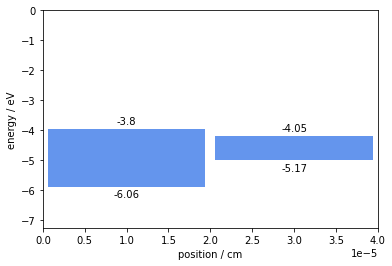

In [3]:
jaxpv.plotting.plot_bars(des)

In [4]:
results = jaxpv.simulator.simulate(des, ls)

INFO:root:Solving equilibrium...
INFO:root:	 iteration: 1          error: 10.028145843016326
INFO:root:	 iteration: 2          error: 7.442638839146557
INFO:root:	 iteration: 3          error: 4.827013587595582
INFO:root:	 iteration: 4          error: 2.5986979535058374
INFO:root:	 iteration: 5          error: 0.9010740966654878
INFO:root:	 iteration: 6          error: 0.00020408684058959172
INFO:root:	 iteration: 7          error: 1.9510781811471721e-10
INFO:root:Solving for 0.0 V...
INFO:root:	 iteration: 1          error: 6.730938037071843e+22
INFO:root:	 iteration: 2          error: 0.6196581344689489
INFO:root:	 iteration: 3          error: 0.2544815827640888
INFO:root:	 iteration: 4          error: 0.0383378530011564
INFO:root:	 iteration: 5          error: 0.0007539430824570572
INFO:root:	 iteration: 6          error: 2.8435639242712724e-07
INFO:root:Solving for 0.02203006722399269 V...
INFO:root:	 iteration: 1          error: 0.8521610477326362
INFO:root:	 iteration: 2         

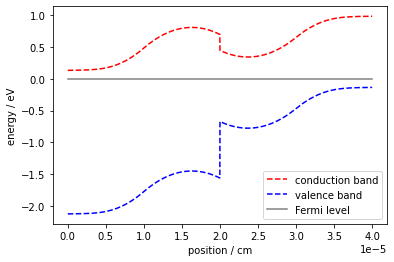

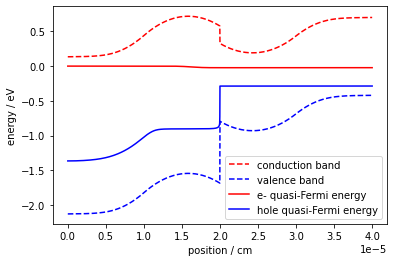

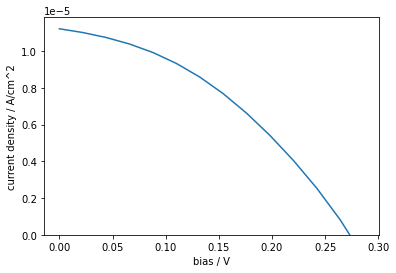

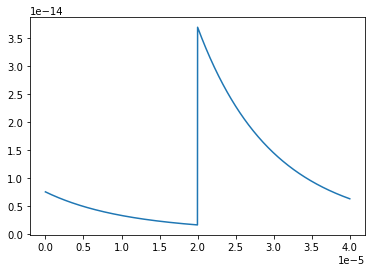

In [5]:
jaxpv.plotting.plot_band_diagram(des, results["eq"], eq=True)
jaxpv.plotting.plot_band_diagram(des, results["Voc"], eq=False)
jaxpv.plotting.plot_iv_curve(*results["iv"])
plt.plot(jaxpv.scales.length * des.grid, results["cell"].G)
plt.show()